In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
#import modules
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import math
#import modules
import os
import glob
import pandas as pd

In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
data = pd.read_csv('/content/JPM (2).csv', on_bad_lines='skip')
# data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,36.490002,36.490002,35.680000,36.349998,19.820818,7929300
1,2002-01-03,36.500000,37.500000,36.340000,37.320000,20.349741,10348200
2,2002-01-04,38.020000,39.099998,38.020000,39.000000,21.265799,10432900
3,2002-01-07,39.049999,39.680000,38.900002,38.900002,21.211271,9453000
4,2002-01-08,39.000000,39.049999,38.279999,38.599998,21.047691,7604000


# ***Exploratory Data Analysis***

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000,5.036000e+03
mean,61.954643,62.610943,61.290044,61.954637,50.098574,2.197999e+07
std,34.764019,35.008160,34.537209,34.761899,35.901041,1.975322e+07
min,15.370000,16.350000,14.960000,15.450000,8.750385,1.347300e+06
25%,37.900002,38.335000,37.419998,37.860001,25.249908,1.059055e+07
50%,46.664999,47.130001,46.045000,46.580002,32.431270,1.497950e+07
75%,83.954998,85.237501,83.142502,84.035000,71.820583,2.617765e+07
max,172.710007,172.960007,170.539993,171.779999,166.523987,2.172942e+08


In [ ]:
# to check null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data = data.dropna()
data = data.drop_duplicates()

In [ ]:
# converting the datetype of Date from object to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)
data.sort_values('Date',inplace=True)


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,36.490002,36.490002,35.680000,36.349998,19.820818,7929300
2002-01-03,36.500000,37.500000,36.340000,37.320000,20.349741,10348200
2002-01-04,38.020000,39.099998,38.020000,39.000000,21.265799,10432900
2002-01-07,39.049999,39.680000,38.900002,38.900002,21.211271,9453000
2002-01-08,39.000000,39.049999,38.279999,38.599998,21.047691,7604000
...,...,...,...,...,...,...
2021-12-27,157.600006,158.199997,156.339996,158.160004,153.320724,6188100
2021-12-28,158.199997,160.149994,158.080002,158.639999,153.786026,6342300
2021-12-29,158.850006,159.630005,158.149994,158.559998,153.708466,6398900


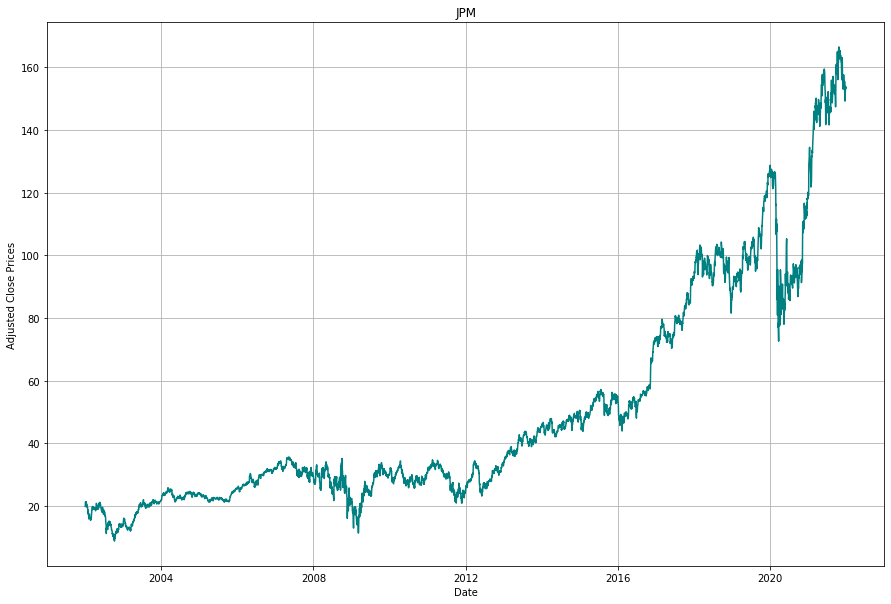

In [ ]:
#plot closing price grouped by date
df_close = data['Adj Close']
# df_close = np.log(df_close)
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Prices')
plt.plot(df_close, 'teal')
plt.title('JPM')
plt.show()

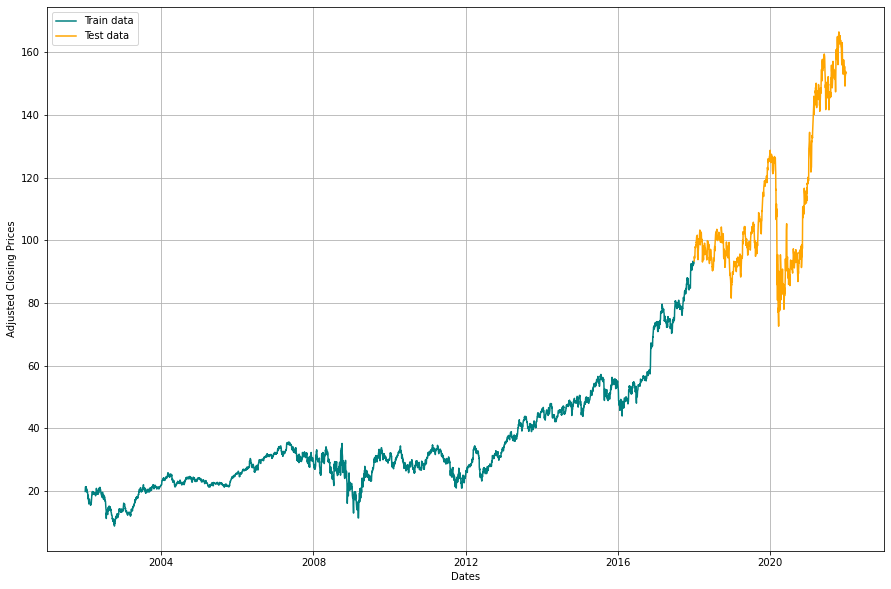

In [ ]:
#split data into train and training set
partition_size = 0.80
train_data, test_data = df_close[:int(len(df_close)*partition_size)], df_close[int(len(df_close)*partition_size):]
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adjusted Closing Prices')
plt.plot(train_data, 'teal', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.legend()

# ***Time Series ARIMA Model***

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8116.247, Time=3.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8141.541, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8120.872, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8119.777, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8142.511, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8116.502, Time=5.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8116.561, Time=5.91 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8119.803, Time=1.80 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8120.434, Time=1.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8118.428, Time=12.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8118.465, Time=0.58 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 34.400 seconds


In [ ]:
prediction, confint = model.predict(n_periods=len(test_data), return_conf_int=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
cf= pd.DataFrame(confint)

In [ ]:
prediction_series = pd.Series(prediction)
prediction_series = prediction_series.set_axis(test_data.index)


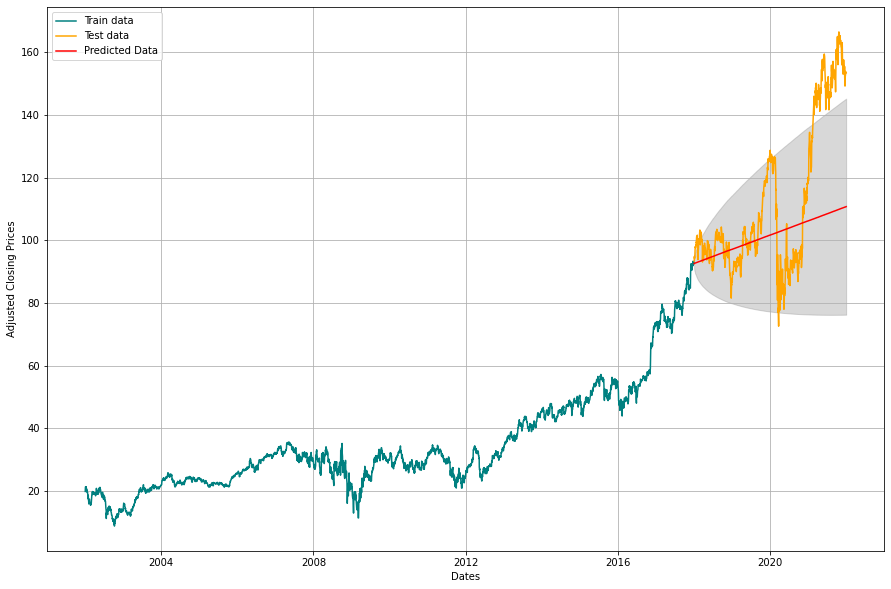

In [ ]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adjusted Closing Prices')
plt.plot(train_data, 'teal', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.plot(prediction_series, 'red', label='Predicted Data')
plt.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)
plt.legend()

In [ ]:
# report performance
mse = mean_squared_error(test_data, prediction_series)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, prediction_series)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, prediction_series))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prediction_series - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
print('Accuracy: '+str(100-mape))

MSE: 531.0930890798021
MAE: 16.602942010265114
RMSE: 23.045457016075904
MAPE: 0.13130432607756506
Accuracy: 99.86869567392243


# ***Prophet***

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
prophet_train_data = pd.DataFrame(train_data)
prophet_train_data.reset_index(inplace=True)
prophet_train_data = prophet_train_data.rename(columns={'Date':'ds','Adj Close':'y'})
prophet_train_data['ds'] = pd.DatetimeIndex(prophet_train_data['ds'])
model = Prophet()
model.fit(prophet_train_data)
future_dates = list(set([str(i) for i in test_data.index]))
future_dates.sort()
future = pd.DataFrame(future_dates)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# model.plot(forecast, uncertainty=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzb2mzji/vsed4lw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjzb2mzji/mcrltkhc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48514', 'data', 'file=/tmp/tmpjzb2mzji/vsed4lw8.json', 'init=/tmp/tmpjzb2mzji/mcrltkhc.json', 'output', 'file=/tmp/tmpjzb2mzji/prophet_modelbw2pykpr/prophet_model-20221227021713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:17:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:17:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


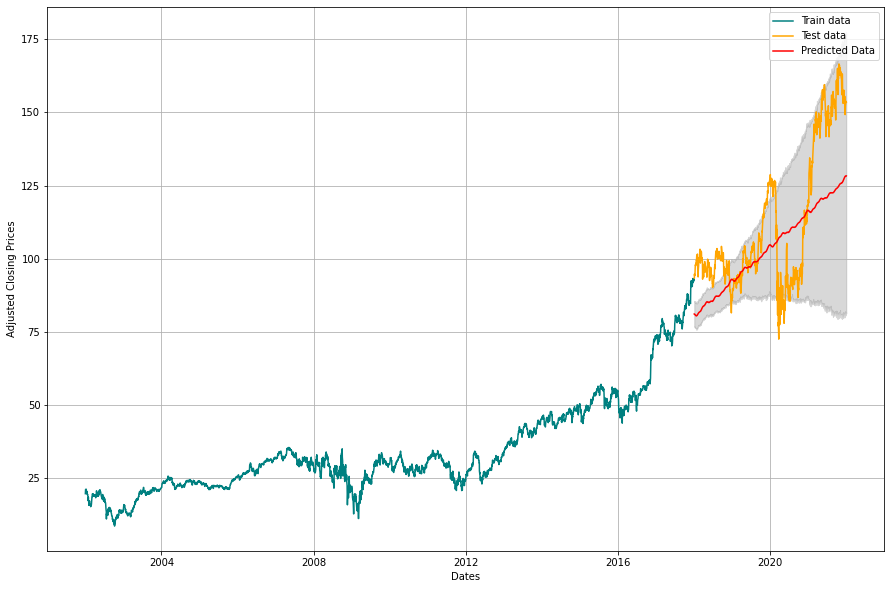

In [ ]:
# Prophet Prediction
prophet_prediction = pd.DataFrame(forecast)
prophet_prediction['ds'] = pd.to_datetime(prophet_prediction['ds'])
prophet_prediction.set_index('ds',inplace=True)
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adjusted Closing Prices')
plt.plot(train_data, 'teal', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.plot(prophet_prediction.index,prophet_prediction['yhat'], 'red', label='Predicted Data')
plt.fill_between(prophet_prediction.index,
                prophet_prediction['yhat_upper'],
                prophet_prediction['yhat_lower'],color='grey',alpha=.3)

plt.legend()

In [ ]:
# report performance
prophet_prediction = prophet_prediction['yhat']

mse = mean_squared_error(test_data, prophet_prediction)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, prophet_prediction)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, prophet_prediction))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(prophet_prediction - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
print('Accuracy: '+str(100-mape))

MSE: 352.6866214950816
MAE: 15.580954407551348
RMSE: 18.77995264890414
MAPE: 0.13378804634081956
Accuracy: 99.86621195365917
